In [2]:
import numpy as np
import pandas as pd
import cv2
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
import matplotlib.pyplot as plt


In [103]:
# 加载 .npz 文件,其中是通过点击不同区域打好的标注数据
data = np.load('training_data.npz')
# 提取数据
trn_x = data['trnx']
trn_y= data['trny']

In [3]:
# 加完整图像
image = cv2.imread('../data/imgs/0618.png')
# 转换为RGB格式（opencv读取为BGR）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
test_x = np.array(image_rgb).reshape(-1,3)
test_x.shape

(125000, 3)

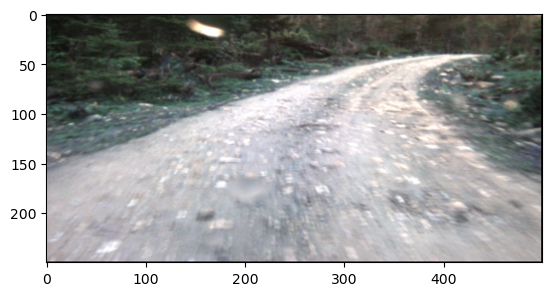

In [5]:
plt.figure()
plt.imshow(image)
plt.show()

In [105]:
# 这里有bug，训练预测结果全 1 
# class LinearSVM:
#     def __init__(self, C=1.0, learning_rate=0.01, max_iter=1000):
#         self.C = C
#         self.learning_rate = learning_rate
#         self.max_iter = max_iter

#     def fit(self, X, y):
#         n_samples, n_features = X.shape
#         self.w = np.zeros(n_features)
#         self.b = 0

#         for _ in range(self.max_iter):
#             for i in range(n_samples):
#                 if y[i] * (np.dot(X[i], self.w) + self.b) < 1:
#                     self.w += self.learning_rate * (self.C * y[i] * X[i] - 2 * (1 / self.max_iter) * self.w)
#                     self.b += self.learning_rate * self.C * y[i]
#                 else:
#                     self.w += self.learning_rate * (-2 * (1 / self.max_iter) * self.w)

#     def predict(self, X):
#         return np.sign(np.dot(X, self.w) + self.b)
# 创建LinearSVC实例
clf = LinearSVC(C=1.0, loss='hinge', max_iter=100000)

# 训练模型
clf.fit(trn_x, trn_y)

# 预测
predictions = clf.predict(test_x)

# 输出预测结果
print(predictions)

[0 0 0 ... 0 0 0]


c:\Users\HiO\.conda\envs\PatternRecognition\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [106]:
predictions.shape

(125000,)

In [107]:
# 将数组转换为Pandas Series
series = pd.Series(predictions)
# 使用value_counts方法统计每个元素的出现次数
value_counts = series.value_counts()
# 输出分布情况
print(value_counts)

1    75545
0    49455
Name: count, dtype: int64


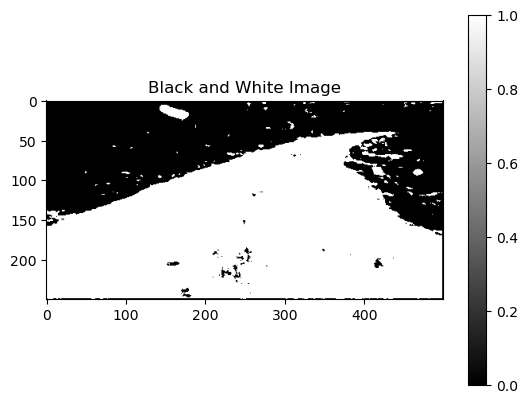

In [108]:
result_image = predictions.reshape(250, 500)
# 显示图像
plt.imshow(result_image, cmap='gray')
plt.colorbar()
plt.title('Black and White Image')
plt.show()